Use Seaborn for plotting functions.

All code should be done without using any loops.

Initialize the USA Daily Average temperatures dataset as shown below:

df = pd.read_csv('http://people.bu.edu/kalathur/datasets/usa_daily_avg_temps.csv.gz', header=0)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('http://people.bu.edu/kalathur/datasets/usa_daily_avg_temps.csv.gz', header=0)
print(df.head())
print(len(df))

     state        city  month  day  year  avgtemp
0  Alabama  Birmingham      1    1  1995     50.7
1  Alabama  Birmingham      1    1  1996     56.8
2  Alabama  Birmingham      1    1  1997     60.9
3  Alabama  Birmingham      1    1  1998     35.6
4  Alabama  Birmingham      1    1  1999     41.0
1174605


# PART 1


For Part1, do not use any aggregation, grouping, merge/join operations.

Q1. Show the distribution plot for the 'avgtemp' attribute. What anamoly do you notice from this
plot?

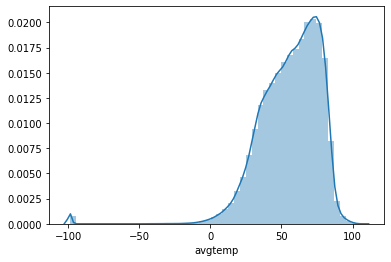

In [2]:
sns.distplot(df['avgtemp'])

# Anomoly Most temperatures are between approximately -25 and 100 degrees.  However, some temperatures 
# are around -100 degrees.  The extreme low temperatures are the anamoly.

Q2. Display the rows in the dataframe which have this anamoly. What do you infer about the data collection process?

In [3]:
anamolies = df[df['avgtemp'] < -50]
print(anamolies)

# It looks like the sensors can fail sometimes and when they do the failure value is always -99.
print("Anomolies not equal to -99.0 =", len(anamolies[anamolies['avgtemp'] != -99.0]))

           state        city  month  day  year  avgtemp
25       Alabama  Birmingham      1   10  1999    -99.0
92       Alabama  Birmingham      1   13  2003    -99.0
2240     Alabama  Birmingham     12   24  1998    -99.0
2380     Alabama  Birmingham     12   30  1998    -99.0
2400     Alabama  Birmingham     12   31  1998    -99.0
...          ...         ...    ...  ...   ...      ...
1172302  Wyoming    Cheyenne      6   20  2002    -99.0
1172323  Wyoming    Cheyenne      6   21  2002    -99.0
1173756  Wyoming    Cheyenne      8   28  2007    -99.0
1174324  Wyoming    Cheyenne      9   24  2008    -99.0
1174549  Wyoming    Cheyenne      9    7  2002    -99.0

[3990 rows x 6 columns]
Anomolies not equal to -99.0 = 0


Q3. Do an in-place replacement in the dataframe for the above value with the NaN value.

In [4]:
df['avgtemp'].replace(-99.0, np.nan, inplace=True)
df[25:30]

,state,city,month,day,year,avgtemp
25,Alabama,Birmingham,1,10,1999,NaN
26,Alabama,Birmingham,1,10,2000,60.0
27,Alabama,Birmingham,1,10,2001,31.1
28,Alabama,Birmingham,1,10,2002,56.4
29,Alabama,Birmingham,1,10,2003,47.2


Q4. Do an in-place fill of the missing value (NaN value) in the dataframe with the forward fill approach. Show the distribution plot for the 'avgtemp' attribute to make sure the observed anamoly is gone.

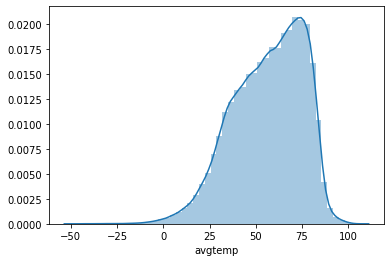

In [5]:
df['avgtemp'].ffill(inplace=True)
sns.distplot(df['avgtemp'])

Q5. For the city Boston, which New Year day is the coldest? warmest? Show the dataframe with the New Year days for Boston. Show an appropriate plot for the 'avgtemp' attribute all the available New Years days for Boston.

Coldest: <bound method Series.idxmin of 467446    38.5
467447    34.1
467448    10.0
467449    14.2
467450    21.7
467451    34.8
467452    27.6
467453    28.7
467454    40.5
467455    40.2
467456    45.9
467457    27.8
467458    38.3
467459    34.6
467460    11.7
467461    29.6
467462    43.8
467463    43.0
467464    33.5
467465    24.1
467466    26.1
Name: avgtemp, dtype: float64>
Empty DataFrame
Columns: [state, city, month, day, year, avgtemp]
Index: []


Warmest: <bound method Series.idxmax of 467446    38.5
467447    34.1
467448    10.0
467449    14.2
467450    21.7
467451    34.8
467452    27.6
467453    28.7
467454    40.5
467455    40.2
467456    45.9
467457    27.8
467458    38.3
467459    34.6
467460    11.7
467461    29.6
467462    43.8
467463    43.0
467464    33.5
467465    24.1
467466    26.1
Name: avgtemp, dtype: float64>
Empty DataFrame
Columns: [state, city, month, day, year, avgtemp]
Index: []


                state    city  month  day    year  avgtemp
467446  Massa

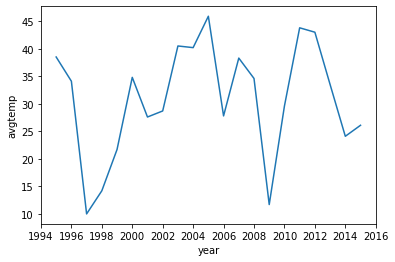

In [6]:
filter1 = df['city'] == 'Boston'
filter2 = df['month'] == 1
filter3 = df['day'] == 1

boston_new_years = df.where(filter1 & filter2 & filter3).dropna()

coldest = boston_new_years['avgtemp'].idxmin
warmest = boston_new_years['avgtemp'].idxmax

print("Coldest:", coldest)
print(boston_new_years[boston_new_years.index == coldest])

print()
print()

print("Warmest:", warmest)
print(boston_new_years[boston_new_years.index == warmest])

print()
print()
print(boston_new_years)

ax = sns.lineplot(x='year', y="avgtemp", data=boston_new_years);
ax.xaxis.set_major_locator(plt.MultipleLocator(2))

Q6. Create a subset of the dataframe for the cities Boston and Orlando with all the data for the first day of each month for all the available years (use the isin method for the cities).

In [7]:
filter1 = df['city'].isin(['Boston', 'Orlando'])
filter2 = df['day'] == 1

boston_and_orlando_new_years = df.where(filter1 & filter2).dropna()
print(boston_and_orlando_new_years)

                state     city  month  day    year  avgtemp
202432        Florida  Orlando    1.0  1.0  1995.0     66.7
202433        Florida  Orlando    1.0  1.0  1996.0     68.2
202434        Florida  Orlando    1.0  1.0  1997.0     68.8
202435        Florida  Orlando    1.0  1.0  1998.0     49.9
202436        Florida  Orlando    1.0  1.0  1999.0     60.9
...               ...      ...    ...  ...     ...      ...
474456  Massachusetts   Boston    9.0  1.0  2011.0     66.2
474457  Massachusetts   Boston    9.0  1.0  2012.0     74.4
474458  Massachusetts   Boston    9.0  1.0  2013.0     73.2
474459  Massachusetts   Boston    9.0  1.0  2014.0     76.8
474460  Massachusetts   Boston    9.0  1.0  2015.0     75.6

[502 rows x 6 columns]


Q7. Using the data from Q6, show the strip plot for the avgtemp attribute of the two cities using the year for the hue semantic.

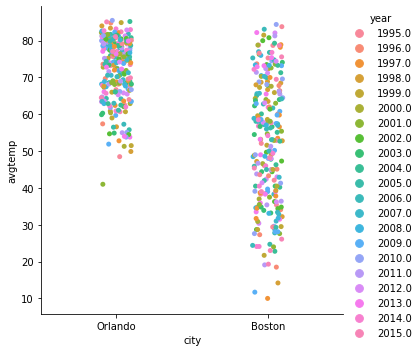

In [8]:
sns.catplot(x="city", y="avgtemp", hue="year", 
            data=boston_and_orlando_new_years, kind='strip');


Q8. Using the data from Q6, show the swarm plot for the avgtemp attribute of the two cities using the year for the hue semantic. What do you infer from the plot?

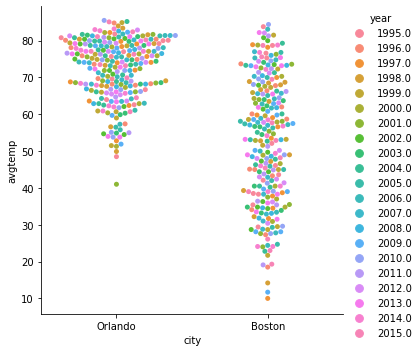

In [9]:
sns.catplot(x="city", y="avgtemp", hue="year", 
            data=boston_and_orlando_new_years, kind='swarm');

# Orlando temperatures tend to cluster together much better than Boston temperatures do.
# Boston temperatures tend to be more linear.

Q9. Using the data from Q6, show the monthly breakdown of the strips plots for the avgtemp attribute of the two cities using the year for the hue semantic. Use col_wrap=4 for the plot. Write at least two conclusions from the plot.

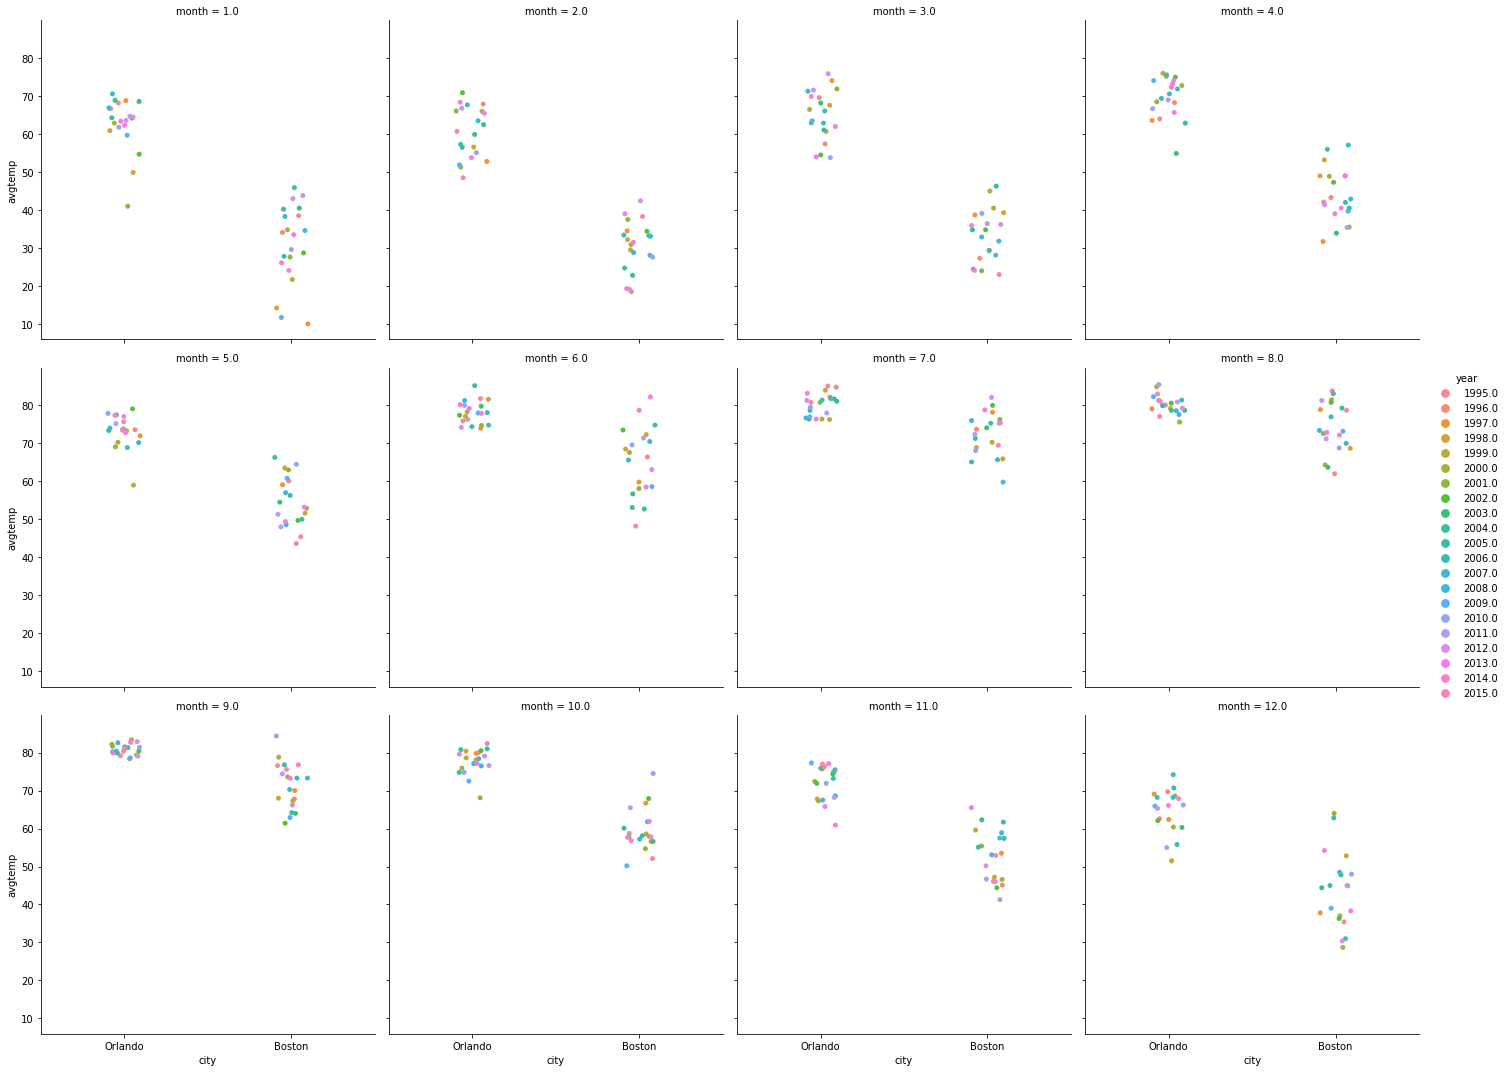

In [10]:
sns.catplot(x="city", y="avgtemp", hue="year", 
            col='month', col_wrap=4,
            data=boston_and_orlando_new_years, kind='strip');

# Boston temperatures vary more widely over the years than Orlando temperatures do, especially in the non-winter months.
# Orlando temperatures are about 25-30 degrees warmer than Boston temperatures

Q10. Using the data from Q6, show the monthly box plots for the avgtemp attribute of the two cities using the city for the hue semantic. Write at least two conclusions from the plot.

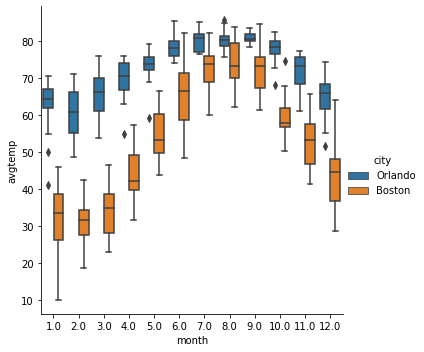

In [11]:
sns.catplot(x="month", y="avgtemp", hue="city", kind="box", data=boston_and_orlando_new_years);

# The difference in temperatures between Orlando and Boston for the first 6 months are greater than the last 6 months.
# Boston temperatures have a wider range of values for any given month than Orlando temperatures do.

# PART2

For Part2, use the aggregation, merging and other operations covered during the class.

Q11. What are the maximum yearly temperatures recorded? Show the resulting dataframe and
an appropriate plot.

               state       city  month  day  year  maxtemp
year                                                      
1995 75718   Arizona       Yuma      7   29  1995    104.3
1996 75755   Arizona       Yuma      7   31  1996    104.3
1997 76020   Arizona       Yuma      8   23  1997    100.6
1998 62784   Arizona    Phoenix      7   16  1998    103.0
1999 617998   Nevada  Las Vegas      7    1  1999    100.1
2000 63038   Arizona    Phoenix      7   27  2000    101.6
2001 63102   Arizona    Phoenix      7    3  2001    104.4
2002 63271   Arizona    Phoenix      7    9  2002    102.6
2003 62768   Arizona    Phoenix      7   15  2003    105.8
2004 62706   Arizona    Phoenix      7   12  2004    101.0
2005 618214   Nevada  Las Vegas      7   19  2005    105.5
2006 75645   Arizona       Yuma      7   22  2006    107.5
2007 63213   Arizona    Phoenix      7    6  2007    104.4
2008 63298   Arizona    Phoenix      8    1  2008    102.9
2009 63068   Arizona    Phoenix      7   28  2009    103

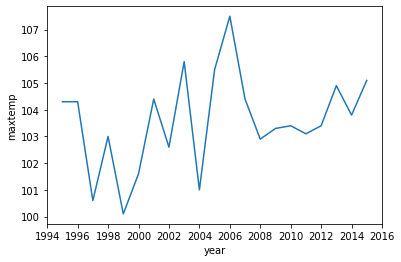

In [12]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column, ascending=False)[:n]

maxtemp_per_year_df = df.groupby('year').apply(lambda x:  top(x, n=1, column='avgtemp'))
maxtemp_per_year_df.rename(columns={'avgtemp' : 'maxtemp'}, inplace=True)
print(maxtemp_per_year_df)


ax = sns.lineplot(x="year", y="maxtemp", data=maxtemp_per_year_df);
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
print(df.iloc[75718])

Q12. Show the dataframe with the state, city, month, day, year, avgtemp reflecting the maximum yearly temperatures computed with the dataframe from Q11.

In [13]:
maxtemp_per_year_df.drop('year', axis='columns', inplace=True)
maxtemp_per_year_df.reset_index(inplace=True)
maxtemp_per_year_df.set_index('level_1', inplace=True)
maxtemp_per_year_df.index.name = 'index'
maxtemp_per_year_df = maxtemp_per_year_df[['state', 'city', 'month', 'day', 'year', 'maxtemp']]
maxtemp_per_year_df

,state,city,month,day,year,maxtemp
index,,,,,,
75718,Arizona,Yuma,7,29,1995,104.3
75755,Arizona,Yuma,7,31,1996,104.3
76020,Arizona,Yuma,8,23,1997,100.6
62784,Arizona,Phoenix,7,16,1998,103.0
617998,Nevada,Las Vegas,7,1,1999,100.1
63038,Arizona,Phoenix,7,27,2000,101.6
63102,Arizona,Phoenix,7,3,2001,104.4
63271,Arizona,Phoenix,7,9,2002,102.6
62768,Arizona,Phoenix,7,15,2003,105.8


Q13. Using the appropriate pandas method, show the relationship of the frequencies between the state and city values for result from Q12.

In [14]:
pd.DataFrame(maxtemp_per_year_df.groupby(['state', 'city']).size())

0
state   city         
Arizona Phoenix    14
        Yuma        4
Nevada  Las Vegas   3

Q14. What are the maximum temperatures recorded for each state? Show the resulting dataframe and an appropriate plot.

                                 state                  city  month  day  \
state                                                                      
Alabama        13333           Alabama            Huntsville      7    1   
Alaska         43557            Alaska             Fairbanks      6   25   
Arizona        75645           Arizona                  Yuma      7   22   
Arkansas       83391          Arkansas            Fort Smith      8    3   
California     98075        California                Fresno      7    5   
Colorado       158846         Colorado                Pueblo      7   24   
Connecticut    174060      Connecticut  Hartford Springfield      7   22   
Delaware       180425         Delaware            Wilmington      7    7   
Florida        215455          Florida           Tallahassee      6   24   
Georgia        246438          Georgia              Columbus      7   18   
Hawaii         269682           Hawaii              Honolulu      7    5   
Idaho       

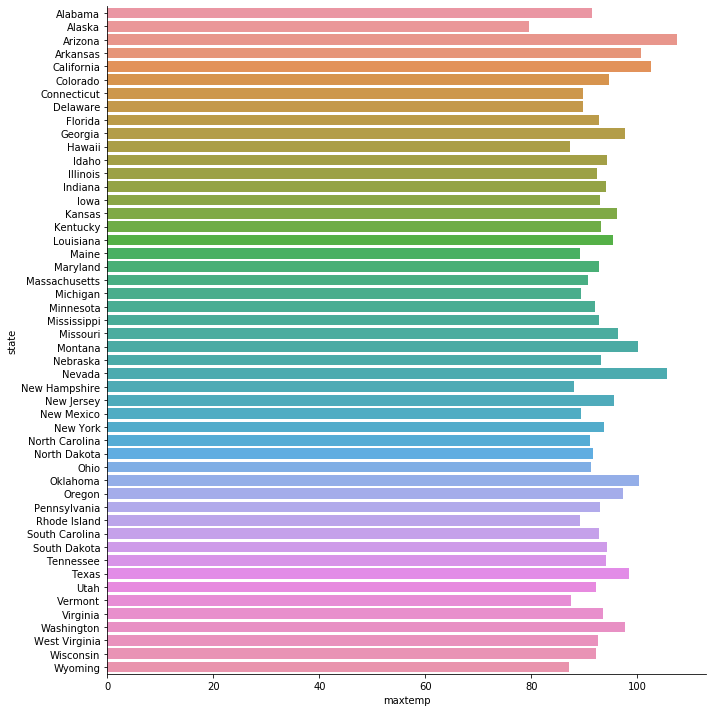

In [15]:
maxtemp_per_state_df = df.groupby('state').apply(lambda x:  top(x, n=1, column='avgtemp'))
maxtemp_per_state_df.rename(columns={'avgtemp' : 'maxtemp'}, inplace=True)
print(maxtemp_per_state_df)

sns.catplot(x="maxtemp", y="state", height=10, aspect=1, kind="bar", 
            data=maxtemp_per_state_df);

Q15. Show the dataframe with the state, city, month, day, year, avgtemp reflecting the maximum temperatures computed with the dataframe from Q14.

In [16]:
maxtemp_per_state_df.drop(columns='state', inplace=True)
maxtemp_per_state_df.reset_index(inplace=True)
maxtemp_per_state_df.set_index('level_1', inplace=True)
maxtemp_per_state_df.index.name='index'
print(maxtemp_per_state_df)

                  state                  city  month  day  year  maxtemp
index                                                                   
13333           Alabama            Huntsville      7    1  2012     91.5
43557            Alaska             Fairbanks      6   25  2013     79.5
75645           Arizona                  Yuma      7   22  2006    107.5
83391          Arkansas            Fort Smith      8    3  2011    100.7
98075        California                Fresno      7    5  2014    102.6
158846         Colorado                Pueblo      7   24  2003     94.7
174060      Connecticut  Hartford Springfield      7   22  2011     89.8
180425         Delaware            Wilmington      7    7  2010     89.7
215455          Florida           Tallahassee      6   24  1996     92.8
246438          Georgia              Columbus      7   18  2000     97.7
269682           Hawaii              Honolulu      7    5  2015     87.2
277044            Idaho                 Boise      